<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
!pip install mahotas

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 152 (delta 86), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (152/152), 438.64 KiB | 9.97 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [ ]:
!ls

ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
README.md


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 41.54 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 36.69 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 152 (delta 86), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (152/152), 438.64 KiB | 11.54 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [ ]:
from big_segment import Segmenta  # got image provided segmented
#from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from ANN_FIND_GRAIN_NOVO import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [ ]:
!ls

ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
README.md


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 41.08 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado


In [ ]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 41.08 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado


In [ ]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [ ]:
df=Segmenta(img)

In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 3ms/step - loss: 5.6290 - accuracy: 0.2931
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 7.1580 - accuracy: 0.0357
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 6.7692 - accuracy: 4.8591e-04
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 7.6155 - accuracy: 0.1940
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 6.0763 - accuracy: 0.2055
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 6.8505 - accuracy: 0.0350
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 7.2561 - accuracy: 0.0293
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 6.8384 - accuracy: 0.1270
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 5.6078 - accuracy: 0.2450
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 6.1971 - accuracy: 0.0639
Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# print(y_pred.ravel())

In [ ]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [ ]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [ ]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,163,69.678574,70.215591,74.665253,79.683655,81.552940,77.526062,79.887497,83.105240,78.659119,63.333054,43.858070,42.193718,41.688244,38.534195,39.046597,43.993713,46.350971,50.685650,58.190968,54.798519,49.963337,49.574165,46.799881,42.971962,33.265347,94.140266,144.348526,151.722076,71.011627,75.375961,80.456581,85.517746,85.100830,81.351120,78.511688,81.165154,84.666794,78.725510,61.990776,...,58.601944,40.368359,9.987090,15.364183,6.778012,86.596680,108.879745,106.114578,104.091690,102.974586,96.175919,89.292854,69.841805,70.188530,68.286873,66.145058,66.078362,67.485413,66.313858,59.404984,49.814861,53.289661,61.330421,64.081146,64.321274,64.784447,61.608269,63.160374,57.892624,32.607662,14.209380,13.617260,9.563364,65.961197,102.456161,104.400696,104.898712,101.131020,96.200607,87.479767
1,171,94.173035,93.950066,99.633118,111.911499,116.761612,115.416313,105.344551,111.375603,124.662491,112.977531,72.672691,70.265244,105.330528,133.429626,152.625595,146.062622,140.446884,125.338699,125.187988,135.635788,157.948074,176.948593,208.291534,237.001663,147.044556,121.239830,117.600555,109.895889,101.745293,102.214638,111.613708,119.006470,116.957222,103.946930,102.601822,113.700287,115.105438,88.951195,63.504192,...,98.216438,96.985573,81.450363,67.337372,62.787830,87.778969,115.945175,129.606079,139.496704,146.089218,145.030640,142.376419,91.262711,95.378365,90.891930,94.335388,99.865730,100.379257,99.164116,99.257675,101.697380,109.382889,119.454231,121.476730,125.712494,132.409256,108.996475,99.864845,101.163399,102.268700,95.851097,68.769470,61.208744,60.628395,107.055000,133.007111,141.455460,146.388809,147.557922,145.434052
2,104,65.321014,67.605026,82.784035,91.951187,115.914215,127.778114,133.745575,134.229294,130.616867,126.167168,121.680481,120.352074,121.853561,119.489655,120.715988,120.396461,124.584328,133.309174,140.307709,145.498535,146.602081,142.797348,134.458588,132.869827,132.609482,136.187881,133.501480,139.534042,69.349121,70.803261,96.961548,108.112434,121.288475,126.522194,130.510361,128.915695,125.750000,121.823967,115.745567,...,97.488182,99.168648,100.396454,100.602089,100.661255,100.146454,101.020721,100.218941,99.031067,96.008881,73.488174,74.282555,103.405334,102.618347,105.923088,102.625740,103.244095,100.201187,97.100601,99.349121,96.208588,94.429008,93.886101,91.211548,92.446762,93.016281,94.797348,95.218948,98.424561,102.855042,102.455627,99.113914,100.859474,103.028114,103.108002,103.662735,102.890541,101.773682,73.945267,65.926041
3,145,106.390808,107.096451,105.565224,105.534981,107.608368,111.650230,118.389488,122.451988,102.537415,50.355911,66.522858,70.556725,71.025543,68.382309,68.556526,68.125984,64.827202,65.540161,67.045616,75.596107,77.936226,105.431877,133.844040,140.222733,138.368317,136.104935,133.587479,133.276703,109.336647,111.015404,109.603760,110.401855,111.490509,111.452652,112.461311,119.308487,105.528610,50.499073,63.586540,...,102.738693,107.422729,111.774216,121.125084,128.162613,130.449036,129.954620,127.221405,132.807510,142.748260,128.665924,91.605186,68.427734,74.137787,74.473770,72.887756,76.533180,40.535748,47.879856,92.057640,120.250137,121.079620,119.149529,120.917526,125.853409,124.310303,111.604042,94.529610,99.488838,106.198669,112.286652,119.154572,122.958435,121.758148,119.579353,116.763191,129.394897,143.852173,125.908913,85.166084
4,128,107.934570,108.666992,107.218750,100.117188,66.483398,55.961914,54.099609,45.452148,32.543945,26.159180,29.399414,43.476562,60.320312,66.669922,71.115234,73.416016,71.817383,72.103516,73.875977,75.578125,76.224609,83.285156,85.976562,91.696289,87.980469,110.313477,128.863281,141.122070,119.232422,116.900391,113.642578,102.058594,42.012695,21.864258

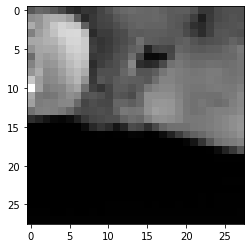

In [ ]:
Size=28
qual_img=7
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [ ]:
mean_value = np.mean(img)
img_new = img.copy()

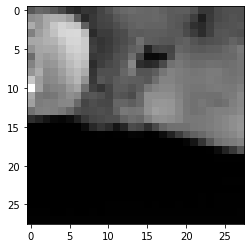

In [ ]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [ ]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

6334.812785114045


In [ ]:
Area_All, Diameter_All=PSDArea(df_size) 


In [ ]:
df_size.shape

(150, 785)

In [ ]:
# print(Area_All)
print(Diameter_All)

[1.5610226518698334, 1.6376372605505614, 0.9039831787806819, 1.3252804622009962, 1.147879084363463, 1.242765988028235, 1.3207922639678136, 1.6188212327138436, 1.9389720982401308, 1.6498283444520951, 1.5099224954462946, 0.9523150153084252, 1.6069870766267969, 1.8887474100358312, 1.1064351630174991, 1.1907322560599913, 1.788837523142964, 1.035590093978594, 1.0396834769541736, 1.8172642866279722, 1.8739381521997889, 1.744184817448278, 1.9062498116188078, 1.55518227802078, 1.6394533784211154, 1.8327476683211146, 1.4016552661561672, 1.4892745987966585, 1.8940446092649574, 1.0705057219867886, 1.430293394102697, 1.3029815302240373, 1.5872802617584583, 1.0383185272843123, 1.4652866841942613, 0.9698056557598252, 1.7223482716807585, 1.6872998181630887, 1.519032097000696, 1.6607367443803993, 1.8172874315215417, 1.440561245904694, 1.1896074282236642, 1.5824867194587309, 1.9436229214134135, 1.8800174492254016, 1.7963514580858395, 1.118734734141718, 1.0143437424395565, 1.0316003365271629, 1.43032171

In [ ]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          0.66666667  4.66666667 16.66666667 78.        ]


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.90 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
PSD_new

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162
...,...,...
90,30,1.064
91,31,1.341
92,32,1.044
93,33,1.337


In [ ]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          4.21052632 10.52631579 23.15789474 62.10526316]
[ 0.          0.          0.          0.          0.          0.
  0.          0.66666667  4.66666667 16.66666667 78.        ]


In [ ]:
np.sum(np.array(Perc_value))

100.0

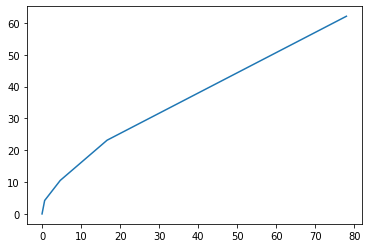

In [ ]:
plt.plot( Perc_value,Perc_new )

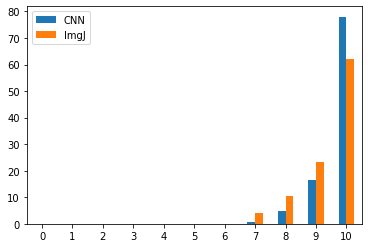

In [ ]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [ ]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ImgJ   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     262.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           5.80e-08
Time:                        21:10:15   Log-Likelihood:                -28.747
No. Observations:                  11   AIC:                             61.49
Df Residuals:                       9   BIC:                             62.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8297      1.188      1.540      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


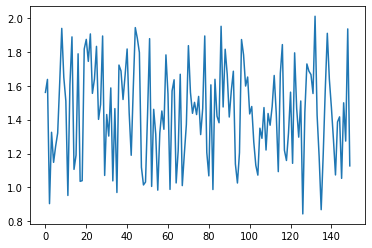

In [ ]:
#plt.plot(Diam)
plt.plot(Diameter_All)

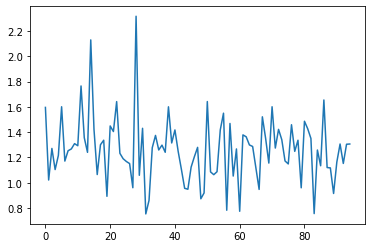

In [ ]:
plt.plot(Diam1)

In [ ]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

,0
count,95.000000
mean,1.260307
std,0.258410
min,0.753568
25%,1.117893
50%,1.267607
75%,1.376667
max,2.317439


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


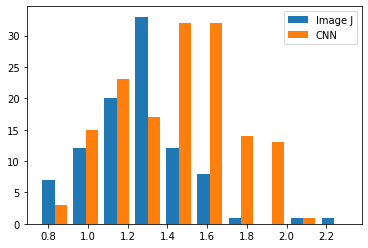

In [ ]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

(array([ 4., 18., 12., 14., 16., 27., 22., 12., 16.,  9.]),
 array([0.84327487, 0.96001498, 1.07675508, 1.19349519, 1.3102353 ,
        1.4269754 , 1.54371551, 1.66045561, 1.77719572, 1.89393583,
        2.01067593]),
 <a list of 10 Patch objects>)

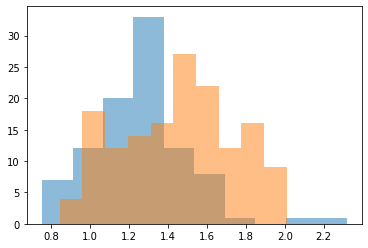

In [ ]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)